# 导入工具包

In [25]:
import cv2
import mediapipe as mp
from tqdm import tqdm

# 获取摄像头数据

In [26]:
cap = cv2.VideoCapture(0)
while True:
    #每一帧都是一幅图像
    ret, frame = cap.read(0)
    #摄像头画面是镜像的
    frame = cv2.flip(frame,1,dst=None)
    cv2.imshow('frame',frame)
    #退出循环的命令
    c = cv2.waitKey(1)
    if c == ord('q'):
        break;
#资源释放        
cap.release()
cv2.destroyAllWindows()

# 关键点检测

In [27]:
#手部检测模型
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode = False,
                      max_num_hands = 1,
                      min_detection_confidence= 0.7,
                      min_tracking_confidence=0.5)
#绘图模型
mpDraw = mp.solutions.drawing_utils

In [28]:
cap = cv2.VideoCapture(0)
while True:
    #每一帧都是一幅图像
    ret, frame = cap.read(0)
    #摄像头画面是镜像的
    frame = cv2.flip(frame,1,dst=None)
   
    img_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    results = hands.process(frame)
    if results.multi_hand_landmarks:
        for hand_idx in range(len(results.multi_hand_landmarks)):
            hand_21 = results.multi_hand_landmarks[hand_idx]
            #保存关键点坐标
            lmList =[]
            for id,lm in enumerate(hand_21.landmark):
                h,w,c = frame.shape
                cx,cy = int(lm.x*w),int(lm.y*h)
                lmList.append([cx,cy])
            mpDraw.draw_landmarks(frame,hand_21,mp_hands.HAND_CONNECTIONS)
    
    cv2.imshow('frame',frame)
    #退出循环的命令
    c = cv2.waitKey(1)
    if c == ord('q'):
        break;
#资源释放        
cap.release()
cv2.destroyAllWindows()



# 单帧处理

In [29]:
#在指定位置添加一束花
def add_flower(img,flower,position,ss):
    img2 = img
    #未添加花的图像的尺寸
    h,w = img.shape[:2]
    #添加花的尺寸
    hl,wl = flower.shape[:2]
    
    #使花的尺寸适配图像的尺寸
    #ww = w/5  #花的宽度是图像的1/5
    ww = ss*3
    s = ww/wl #计算花应该缩放的比例
    #print(s)

    sh = hl*s  #计算花的高度的新值
    sw = wl*s  #计算花的宽度的新值
    #print(sh,sw)

    h_n = int(sh)  #对花进行缩放
    w_n = int(sw)
    img_f = cv2.resize(flower,(h_n,w_n))       
    
    #这里要添加对添加花后的图像的保护
    if position[1]+w_n < w and position[0]+h_n < h:
        #look_img(img_f)
        #print(img_f.shape)
        #替换的位置
        #获取图像上将要放置花的位置
        roi = img[position[1]:position[1]+w_n,position[0]:position[0]+h_n]
        #look_img(roi)
        #print(roi.shape)
        #获取flower的蒙版
        gray = cv2.cvtColor(img_f,cv2.COLOR_BGR2GRAY)
        #mask是花的目标为255，其他位置为0的蒙版
        ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
        #look_img(mask)
        #mask_inv是花的目标为0，其他位置为255的蒙版
        mask_inv = cv2.bitwise_not(mask)
        #look_img(mask_inv)
        #print(mask_inv.shape)
        #逻辑与操作，在roi上，将要添加花的位置设置为0
        img1_bg = cv2.bitwise_and(roi, roi,mask = mask_inv)
        #look_img(img1_bg)
        #取和的操作，在roi上，添加上花
        img_dst = cv2.add(img1_bg,img_f)
        #更新图像上roi        
        img2[position[1]:position[1]+w_n,position[0]:position[0]+h_n]=img_dst
    return img2

In [33]:
def process_frame(img):
    img = cv2.flip(img,1)
    flower = cv2.imread("3.png")#要更换到正确的路径上
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_idx in range(len(results.multi_hand_landmarks)):
            hand_21 = results.multi_hand_landmarks[hand_idx]
            #print(type(hand_21))
            lmList =[]
            for id,lm in enumerate(hand_21.landmark):
                h,w,c = img.shape
                cx,cy = int(lm.x*w),int(lm.y*h)
                lmList.append([cx,cy])
            #print(len(lmList))
            [cx5, cy5] = lmList[5]
            [cx17, cy17] = lmList[17]
            w = abs(cx17 - cx5)
            #print(w)
            img = add_flower(img,flower,lmList[8],w)
            mpDraw.draw_landmarks(img,hand_21,mp_hands.HAND_CONNECTIONS)
            
            #获取添加花的位置
    return img

# 整体处理

In [34]:
import cv2

cap = cv2.VideoCapture(0)
cap.open(0)

while cap.isOpened():
    ret, frame = cap.read(0)
    
    if not ret:
        print("获取摄像头数据失败")
        break
    
    frame = process_frame(frame)
    
    cv2.imshow("Let's play game!",frame)
    
    c = cv2.waitKey(1)
    if c == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


# 图像融合

In [21]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def look_img(img):
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    plt.figure()
    plt.imshow(img_rgb)
    plt.show()


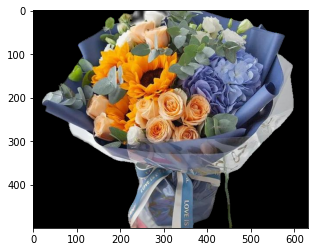

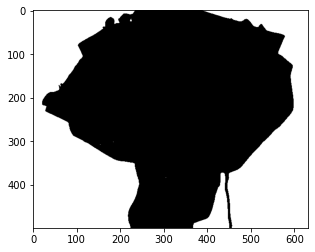

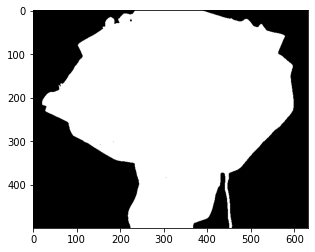

In [22]:
import cv2
flower = cv2.imread("5.png")#要更换到正确的路径上
look_img(flower)
gray = cv2.cvtColor(flower,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
look_img(mask_inv)
look_img(mask)


189 274


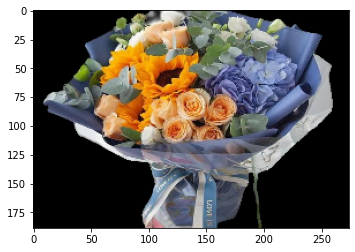

(189, 274)


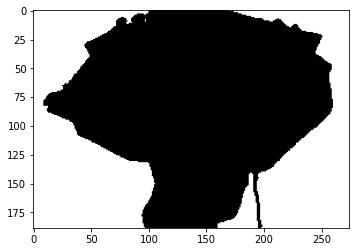

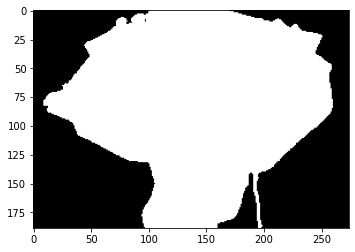

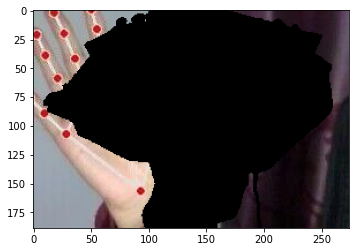

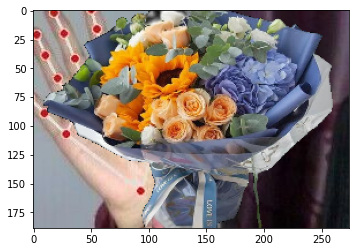

In [24]:
img = cv2.imread("roi.jpg")#要更换到正确的路径上
h,w = img.shape[:2]
print(h,w)

img_logo = cv2.resize(flower,(w,h))
look_img(img_logo)
print(img_logo.shape[:2])

gray = cv2.cvtColor(img_logo,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
look_img(mask_inv)
look_img(mask)

roi = img
img1_bg = cv2.bitwise_and(roi, roi,mask = mask_inv)
img2_bg = cv2.bitwise_and(img_logo,img_logo,mask=mask_inv)
look_img(img1_bg)

img_dst = cv2.add(img1_bg,img_logo)
look_img(img_dst)